In [82]:
import pandas as pd
import pandas as nm
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.pyplot as mtp
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm


parkinsons_data = pd.read_csv('train.csv')

# Data collection and analysis

In [83]:
parkinsons_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [84]:
parkinsons_data.shape


(195, 23)

In [85]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [86]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [87]:
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1->parkinson's disease
0-> healthy

In [88]:

scaler = MinMaxScaler()


num_cols = parkinsons_data.select_dtypes(include=['float64', 'int64']).columns


parkinsons_data[num_cols] = scaler.fit_transform(parkinsons_data[num_cols])

print(parkinsons_data)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0       0.184308      0.112592      0.054815        0.195680   
1       0.198327      0.094930      0.278323        0.254130   
2       0.165039      0.059128      0.265288        0.280178   
3       0.165004      0.072927      0.264200        0.263342   
4       0.161150      0.080909      0.260107        0.354511   
..           ...           ...           ...             ...   
190     0.499820      0.262986      0.165722        0.092440   
191     0.705488      0.307974      0.138243        0.125794   
192     0.502730      0.281413      0.050727        0.378653   
193     0.642893      0.601807      0.054279        0.181703   
194     0.733274      0.322794      0.071948        0.126747   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            0.249012  0.145472  0.247588    0.145288      0.312215   
1            0.288538  0.191233  0.323687    0.191042      0.472887   
2            0.328

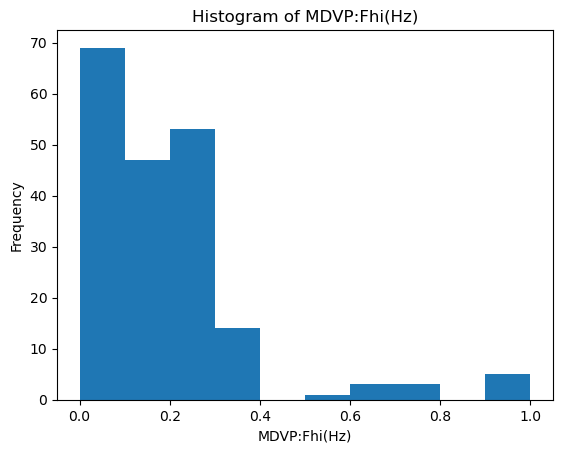

In [89]:
column_name = 'MDVP:Fhi(Hz)'

# create a histogram
plt.hist(parkinsons_data[column_name], bins=10)

# add axis labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)

# display the histogram
plt.show()


# X and Y split


In [90]:
data = pd.read_csv('C:/Users/sanke/Downloads/ML model/train.csv')
knn = KNeighborsClassifier(n_neighbors=3)
x = parkinsons_data.drop(columns=['MDVP:Fo(Hz)','status'],axis=1)
y = parkinsons_data['status']

In [91]:
print(x)

     MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
0        0.112592      0.054815        0.195680          0.249012  0.145472   
1        0.094930      0.278323        0.254130          0.288538  0.191233   
2        0.059128      0.265288        0.280178          0.328063  0.229287   
3        0.072927      0.264200        0.263342          0.328063  0.209056   
4        0.080909      0.260107        0.354511          0.407115  0.282755   
..            ...           ...             ...               ...       ...   
190      0.262986      0.165722        0.092440          0.090909  0.093931   
191      0.307974      0.138243        0.125794          0.090909  0.126686   
192      0.281413      0.050727        0.378653          0.288538  0.267823   
193      0.601807      0.054279        0.181703          0.130435  0.145472   
194      0.322794      0.071948        0.126747          0.090909  0.109345   

     MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimm

In [92]:
print(y)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
190    0.0
191    0.0
192    0.0
193    0.0
194    0.0
Name: status, Length: 195, dtype: float64


# Splitting dataset into training and test data




In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


print(x.shape, x_train.shape, x_test.shape)


(195, 21) (156, 21) (39, 21)


# Data Standarization

In [94]:
scaler = StandardScaler()


In [95]:
scaler.fit(x_train)

StandardScaler()

In [96]:
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

In [97]:
print(x_train)

[[-0.02731081 -0.87985049  0.36806203 ... -0.97586547 -0.55160318
   0.07769494]
 [-0.83337041 -0.9284778  -0.12997764 ...  0.3981808  -0.61014073
   0.39291782]
 [-0.29531068 -1.12211107 -0.55550578 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.6637302  -0.160638   -0.46582048 ...  1.22001022 -0.47404629
  -0.2159482 ]
 [ 0.19731822 -0.79063679 -0.53451561 ... -0.17896029 -0.47272835
   0.28181221]
 [ 0.19922317 -0.61914972  0.29364231 ... -0.716232    1.23632066
  -0.05829386]]


# Support Vector machine Model

In [98]:
model = svm.SVC(kernel='linear')     ##support vector classifier

In [99]:
model.fit(x_train, y_train)

SVC(kernel='linear')

# Non parametric model

# 1.K-Nearest Neighbour Algorithm

In [100]:
knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(x_train, y_train)

# make predictions on the testing data
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)

# calculation of the accuracy, precision, recall, and f1-score of the model
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
precision_test_knn = precision_score(y_test, y_test_pred_knn, average="weighted")
recall_test_knn = recall_score(y_test, y_test_pred_knn, average="weighted")
f1_score_test_knn = f1_score(y_test, y_test_pred_knn, average="weighted")

table = [
    ["KNN", accuracy_test_knn, precision_test_knn, recall_test_knn, f1_score_test_knn]
    # add rows for other algorithms
]

# Print the table
headers = ["Algorithm", "Accuracy", "Precision", "Recall", "F1-Score"]
print(tabulate(table, headers=headers, tablefmt="pipe"))



| Algorithm   |   Accuracy |   Precision |   Recall |   F1-Score |
|:------------|-----------:|------------:|---------:|-----------:|
| KNN         |   0.769231 |    0.802947 | 0.769231 |   0.781582 |


# Random Forest Algorithm

In [101]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the Random Forest classifier on the training data
rf.fit(x_train, y_train)

# make predictions on the training and testing data
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)


# calculation of the accuracy, precision, recall, and f1-score of the model on the testing data
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_score_test_rf = f1_score(y_test, y_test_pred_rf)

table = [
    ["Random Forest", accuracy_test_rf, precision_test_rf, recall_test_rf, f1_score_test_rf]
    # add rows for other algorithms
]

# Print the table
headers = ["Algorithm", "Accuracy", "Precision", "Recall", "F1-Score"]
print(tabulate(table, headers=headers, tablefmt="pipe"))



| Algorithm     |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------------|-----------:|------------:|---------:|-----------:|
| Random Forest |   0.820513 |    0.928571 |  0.83871 |   0.881356 |


# Table for Non Parametric model

In [102]:

data = [("KNN", accuracy_test_knn, precision_test_knn, recall_test_knn, f1_score_test_knn),
        ("Random Forest", accuracy_test_rf, precision_test_rf, recall_test_rf, f1_score_test_rf)]
headers = ["Algorithm", "Accuracy", "Precision", "Recall", "F1-score"]

# create the table using the tabulate function
table = tabulate(data, headers=headers, tablefmt="pretty")

# print the table
print(table)

+---------------+--------------------+--------------------+--------------------+--------------------+
|   Algorithm   |      Accuracy      |     Precision      |       Recall       |      F1-score      |
+---------------+--------------------+--------------------+--------------------+--------------------+
|      KNN      | 0.7692307692307693 | 0.802947052947053  | 0.7692307692307693 | 0.7815823783709599 |
| Random Forest | 0.8205128205128205 | 0.9285714285714286 | 0.8387096774193549 | 0.8813559322033899 |
+---------------+--------------------+--------------------+--------------------+--------------------+


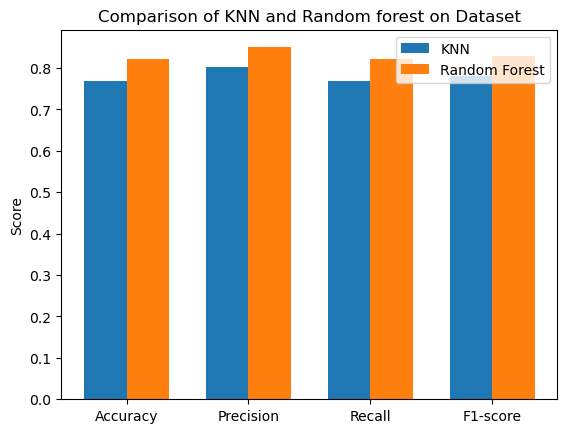

In [103]:
# create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# train the KNN classifier on the training data
knn.fit(x_train, y_train)

# make predictions on the testing data
y_test_pred_knn = knn.predict(x_test)

# calculation of the accuracy, precision, recall, and F1-score of the KNN classifier on the testing data
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
precision_test_knn = precision_score(y_test, y_test_pred_knn, average="weighted")
recall_test_knn = recall_score(y_test, y_test_pred_knn, average="weighted")
f1_score_test_knn = f1_score(y_test, y_test_pred_knn, average="weighted")

# create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the Random Forest classifier on the training data
rf.fit(x_train, y_train)

# make predictions on the testing data
y_test_pred_rf = rf.predict(x_test)

# calculate the accuracy, precision, recall, and F1-score of the Random Forest classifier on the testing data
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf, average="weighted")
recall_test_rf = recall_score(y_test, y_test_pred_rf, average="weighted")
f1_score_test_rf = f1_score(y_test, y_test_pred_rf, average="weighted")

# create a bar chart for accuracy, precision, recall, and F1-score of both classifiers
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
knn_scores = [accuracy_test_knn, precision_test_knn, recall_test_knn, f1_score_test_knn]
rf_scores = [accuracy_test_rf, precision_test_rf, recall_test_rf, f1_score_test_rf]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, knn_scores, width, label='KNN')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title('Comparison of KNN and Random forest on Dataset')
plt.show()

# Parametric Model

# Naive Bayes Algorithm

In [104]:
nb = GaussianNB()

nb.fit(x_train, y_train)


y_train_pred_nb = nb.predict(x_train)
y_test_pred_nb = nb.predict(x_test)



accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)
precision_test_nb = precision_score(y_test, y_test_pred_nb, average="weighted")
recall_test_nb = recall_score(y_test, y_test_pred_nb, average="weighted")
f1_score_test_nb = f1_score(y_test, y_test_pred_nb, average="weighted")

table = [
    ["Naive Bayes", accuracy_test_nb, precision_test_nb, recall_test_nb, f1_score_test_nb]
    # add rows for other algorithms
]

# Print the table
headers = ["Algorithm", "Accuracy", "Precision", "Recall", "F1-Score"]
print(tabulate(table, headers=headers, tablefmt="pipe"))





| Algorithm   |   Accuracy |   Precision |   Recall |   F1-Score |
|:------------|-----------:|------------:|---------:|-----------:|
| Naive Bayes |   0.615385 |    0.866221 | 0.615385 |   0.647062 |


# Logistic Regression


In [105]:
lr = LogisticRegression()


lr.fit(x_train, y_train)


y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

# calculation of the accuracy, precision, recall, and F1-score of the Logistic Regression classifier on the testing data
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)
precision_test_lr = precision_score(y_test, y_test_pred_lr, average="weighted")
recall_test_lr = recall_score(y_test, y_test_pred_lr, average="weighted")
f1_score_test_lr = f1_score(y_test, y_test_pred_lr, average="weighted")


table = [
    ["Logistic Regression", accuracy_test_lr, precision_test_lr, recall_test_nb, f1_score_test_nb]
    # add rows for other algorithms
]

# Print the table
headers = ["Algorithm", "Accuracy", "Precision", "Recall", "F1-Score"]
print(tabulate(table, headers=headers, tablefmt="pipe"))


| Algorithm           |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| Logistic Regression |   0.820513 |    0.829345 | 0.615385 |   0.647062 |


# Table for Parametric model

In [106]:

data = [("Naive Bayes", accuracy_test_nb, precision_test_nb, recall_test_nb, f1_score_test_nb),
        ("Logistic Regression", accuracy_test_lr, precision_test_lr, recall_test_lr, f1_score_test_lr)]
headers = ["Algorithm", "Accuracy", "Precision", "Recall", "F1-score"]

# create the table using the tabulate function
table = tabulate(data, headers=headers, tablefmt="pretty")

# print the table
print(table)

+---------------------+--------------------+--------------------+--------------------+--------------------+
|      Algorithm      |      Accuracy      |     Precision      |       Recall       |      F1-score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|     Naive Bayes     | 0.6153846153846154 | 0.8662207357859532 | 0.6153846153846154 | 0.6470619291484082 |
| Logistic Regression | 0.8205128205128205 | 0.8293447293447295 | 0.8205128205128205 | 0.8243206488143807 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


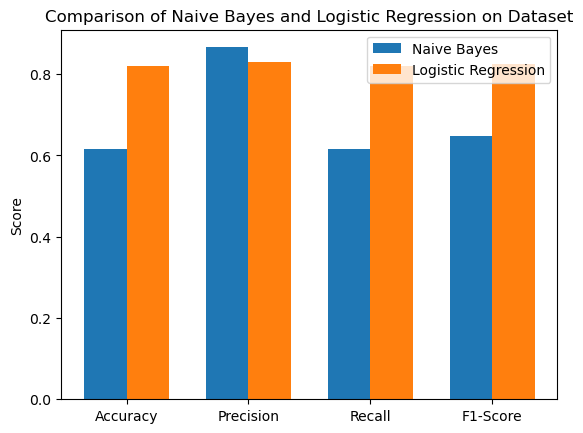

In [107]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_acc = accuracy_score(y_test, nb.predict(x_test))
nb_prec = precision_score(y_test, nb.predict(x_test), average='weighted')
nb_recall = recall_score(y_test, nb.predict(x_test), average='weighted')
nb_f1 = f1_score(y_test, nb.predict(x_test), average='weighted')

# Train and test the logistic regression algorithm
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_acc = accuracy_score(y_test, lr.predict(x_test))
lr_prec = precision_score(y_test, lr.predict(x_test), average='weighted')
lr_recall = recall_score(y_test, lr.predict(x_test), average='weighted')
lr_f1 = f1_score(y_test, lr.predict(x_test), average='weighted')

# Plot the bar chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nb_scores = [nb_acc, nb_prec, nb_recall, nb_f1]
lr_scores = [lr_acc, lr_prec, lr_recall, lr_f1]

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nb_scores, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title('Comparison of Naive Bayes and Logistic Regression on Dataset')
plt.show()

In [108]:
knn_acc = accuracy_score(y_test, knn.predict(x_test))

rf_acc = accuracy_score(y_test, rf.predict(x_test))

nb_acc = accuracy_score(y_test, nb.predict(x_test))

lr_acc = accuracy_score(y_test, lr.predict(x_test))

# Compare the accuracy of the four algorithms and select the one with the highest accuracy
if knn_acc > nb_acc and knn_acc > lr_acc and knn_acc > rf_acc:
    print("The KNN algorithm has the highest accuracy: ", knn_acc)
elif nb_acc > knn_acc and nb_acc > lr_acc and nb_acc > rf_acc:
    print("The Naive Bayes algorithm has the highest accuracy: ", nb_acc)
elif lr_acc > knn_acc and lr_acc > nb_acc and lr_acc > rf_acc:
    print("The Logistic Regression algorithm has the highest accuracy: ", lr_acc)
else:
    print("The Random Forest algorithm has the highest accuracy: ", rf_acc)

The Random Forest algorithm has the highest accuracy:  0.8205128205128205


In [109]:
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score:", accuracy)

Accuracy score: 0.8717948717948718


In [110]:
rf = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = rf.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score:", accuracy)

Accuracy score: 0.8205128205128205


In [111]:
# Initialize the Naive Bayes model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = nb.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score:", accuracy)

Accuracy score: 0.6153846153846154


In [112]:
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = lr.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score:", accuracy)








Accuracy score: 0.8205128205128205


# Choosing the Most accurate algo for Parkinson's disease

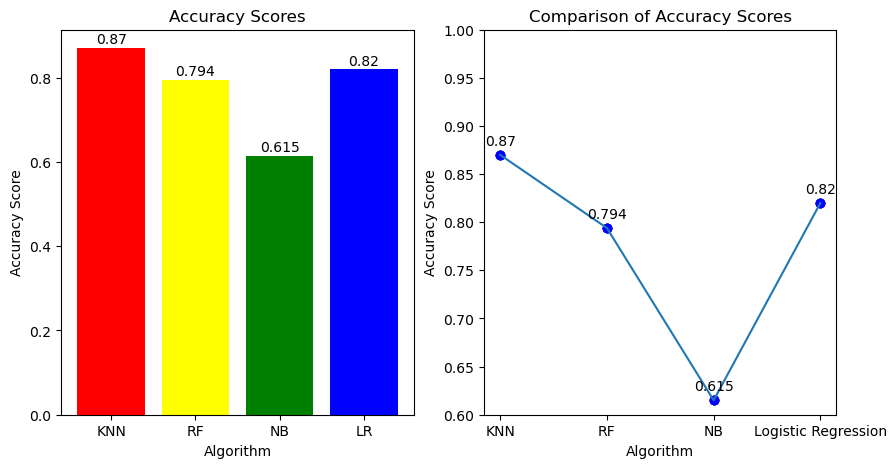

In [113]:


algorithms = ['KNN', 'RF', 'NB', 'LR']
accuracy_scores = [0.87, 0.794, 0.615, 0.82]

# Create the bar chart subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
bars = ax1.bar(algorithms, accuracy_scores, color=['red', 'yellow', 'green', 'blue'])
ax1.set_title('Accuracy Scores')
ax1.set_xlabel('Algorithm')
ax1.set_ylabel('Accuracy Score')

# Add text labels to the top of the bars
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, str(accuracy_scores[i]), ha='center')

x_labels = ['KNN', 'RF', 'NB', 'Logistic Regression']
y_values = [0.87, 0.794, 0.615, 0.82]

# Create the line plot subplot
ax2.plot(x_labels, y_values)
ax2.set_title('Comparison of Accuracy Scores')
ax2.set_xlabel('Algorithm')
ax2.set_ylabel('Accuracy Score')
ax2.set_ylim(0.6, 1.0)

# Add text labels to the line plot
for i, value in enumerate(y_values):
    ax2.text(x_labels[i], value + 0.01, str(value), ha='center')
    
    ax2.scatter(x_labels, y_values, color='blue')

# Show the plot
plt.show()

In [114]:
knn_acc = accuracy_score(y_test, knn.predict(x_test))

rf_acc = accuracy_score(y_test, rf.predict(x_test))

nb_acc = accuracy_score(y_test, nb.predict(x_test))

lr_acc = accuracy_score(y_test, lr.predict(x_test))

# Compare the accuracy of the four algorithms and select the one with the highest accuracy
if knn_acc > nb_acc and knn_acc > lr_acc and knn_acc > rf_acc:
    print("The KNN algorithm has the highest accuracy: ", knn_acc)
elif nb_acc > knn_acc and nb_acc > lr_acc and nb_acc > rf_acc:
    print("The Naive Bayes algorithm has the highest accuracy: ", nb_acc)
elif lr_acc > knn_acc and lr_acc > nb_acc and lr_acc > rf_acc:
    print("The Logistic Regression algorithm has the highest accuracy: ", lr_acc)
else:
    print("The Random Forest algorithm has the highest accuracy: ", rf_acc)

The KNN algorithm has the highest accuracy:  0.8717948717948718


In [117]:
x, y = make_classification(n_samples=1000, n_features=10, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Definez the weak learner (KNN in this case)
class WeakLearner:
    def __init__(self, x, y, k):
        self.x = x
        self.y = y
        self.k = k
    
    def predict(self, x):
        distances = np.sqrt(np.sum((self.x - x[:, np.newaxis])**2, axis=2))
        indices = np.argsort(distances, axis=1)
        k_nearest_labels = self.y[indices[:, :self.k]]
        predictions = np.sign(np.sum(k_nearest_labels, axis=1))
        return predictions

# Define the AdaBoost algorithm
class AdaBoost:
    def __init__(self, x, y, weak_learner, n_estimators):
        self.x = x
        self.y = y
        self.weak_learner = weak_learner
        self.n_estimators = n_estimators
        self.alpha = []
        self.weak_learners = []
    
    def fit(self):
        n_samples = self.x.shape[0]
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            weak_learner = self.weak_learner(self.x, self.y, k=5) 
            predictions = weak_learner.predict(self.x)
            error = np.sum(weights[predictions != self.y])
            alpha = 0.5 * np.log((1 - error) / max(error, 1e-16))
            weights *= np.exp(-alpha * self.y * predictions)
            weights /= np.sum(weights)
            self.alpha.append(alpha)
            self.weak_learners.append(weak_learner)
    
    def predict(self, x):
        predictions = np.zeros(x.shape[0])
        for alpha, weak_learner in zip(self.alpha, self.weak_learners):
            predictions += alpha * weak_learner.predict(x)
        return np.sign(predictions)

# Initialize and train the AdaBoost classifier with KNN as the base estimator
adaboost_knn = AdaBoost(x_train, y_train, WeakLearner, n_estimators=50)
adaboost_knn.fit()

# Make predictions on the test set
y_pred = adaboost_knn.predict(x_test)

# Calculate the accuracy of the AdaBoost classifier with KNN
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.715


In [119]:
# Define the weak learner (Random Forest in this case)
class WeakLearner:
    def __init__(self, x, y, n_estimators, max_depth):
        self.x = x
        self.y = y
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators = []
    
    def train(self):
        n_samples = self.x.shape[0]
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            x_bootstrap = self.x[indices]
            y_bootstrap = self.y[indices]
            estimator = DecisionTree(max_depth=self.max_depth)
            estimator.fit(x_bootstrap, y_bootstrap)
            self.estimators.append(estimator)
    
    def predict(self, x):
        predictions = np.zeros(x.shape[0])
        for estimator in self.estimators:
            predictions += estimator.predict(x)
        return np.sign(predictions)

# Define the AdaBoost algorithm
class AdaBoost:
    def __init__(self, n_estimators, base_learner, max_depth=1):
        self.n_estimators = n_estimators
        self.base_learner = base_learner
        self.max_depth = max_depth
        self.weak_learners = []
        self.alphas = []
    
    def fit(self, X, y):
        n_samples = len(X)
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            weak_learner = self.base_learner(max_depth=self.max_depth)
            weak_learner.fit(X, y, sample_weight=weights)
            predictions = weak_learner.predict(X)
            error = np.sum(weights * (predictions != y)) / np.sum(weights)
            alpha = 0.5 * np.log((1 - error) / max(error, 1e-16))
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)
            self.weak_learners.append(weak_learner)
            self.alphas.append(alpha)
    
    def predict(self, X):
        n_samples = len(X)
        predictions = np.zeros(n_samples)

        for alpha, weak_learner in zip(self.alphas, self.weak_learners):
            predictions += alpha * weak_learner.predict(X)
        
        return np.sign(predictions)


    # Define the decision tree used as weak learners in the Random Forest
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.n_classes = len(np.unique(y))
        self.feature_indices = np.arange(x.shape[1])
        self.tree = self._build_tree(x, y, depth=0)
    
    def _build_tree(self, x, y, depth):
        # Base case: check if all samples belong to the same class or maximum depth is reached
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return np.bincount(y).argmax()
        
        n_samples, n_features = x.shape
        best_feature = None
        best_threshold = None
        best_gini = 1.0
        
        # Find the best feature and threshold that minimizes the Gini impurity
        for feature in self.feature_indices:
            thresholds = np.unique(x[:, feature])
            for threshold in thresholds:
                left_indices = x[:, feature] < threshold
                right_indices = ~left_indices
                left_gini = self._gini_impurity(y[left_indices])
                right_gini = self._gini_impurity(y[right_indices])
                gini = (np.sum(left_indices) / n_samples) * left_gini + (np.sum(right_indices) / n_samples) * right_gini
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
        
        # Split the data based on the best feature and threshold
        left_indices = x[:, best_feature] < best_threshold
        right_indices = ~left_indices
        left_tree = self._build_tree(x[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(x[right_indices], y[right_indices], depth + 1)
        
        return (best_feature, best_threshold, left_tree, right_tree)
    
    def predict(self, x):
        return np.array([self._traverse_tree(x, self.tree) for x in X])
    
    def _traverse_tree(self, x, node):
        if isinstance(node, int):
            return node
        feature, threshold, left_tree, right_tree = node
        if x[feature] < threshold:
            return self._traverse_tree(x, left_tree)
        else:
            return self._traverse_tree(x, right_tree)
    
    def _gini_impurity(self, y):
        _, counts = np.unique(y, return_counts=True)
        proportions = counts / len(y)
        gini = 1 - np.sum(proportions**2)
        return gini

adaboost_rf = AdaBoost(n_estimators=50, base_learner=RandomForestClassifier, max_depth=3)
adaboost_rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_rf.predict(x_test)

# Calculate the accuracy of the AdaBoost classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)







Accuracy: 0.855


In [120]:
# Define the weak learner using Gaussian Naive Bayes
class WeakLearner:
    def __init__(self):
        self.classifier = GaussianNB()
    
    def train(self, x, y):
        self.classifier.fit(x, y)
    
    def predict(self, x):
        return self.classifier.predict(x)

# Define the AdaBoost algorithm
class AdaBoost:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.weak_learners = []
        self.alphas = []
    
    def fit(self, x, y):
        n_samples = len(x)
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            weak_learner = WeakLearner()
            weak_learner.train(x, y)
            predictions = weak_learner.predict(x)
            error = np.sum(weights * (predictions != y)) / np.sum(weights)
            alpha = 0.5 * np.log((1 - error) / max(error, 1e-16))
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)
            self.weak_learners.append(weak_learner)
            self.alphas.append(alpha)
    
    def predict(self, x):
        n_samples = len(x)
        predictions = np.zeros(n_samples)

        for alpha, weak_learner in zip(self.alphas, self.weak_learners):
            predictions += alpha * weak_learner.predict(x)
        
        return np.sign(predictions)

# Initialize and train the AdaBoost classifier with Gaussian Naive Bayes
adaboost_nb = AdaBoost(n_estimators=50)
adaboost_nb.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_nb.predict(x_test)

# Calculate the accuracy of the AdaBoost classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.81


In [121]:
class WeakLearner:
    def __init__(self):
        self.classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
    
    def train(self, x, y):
        self.classifier.fit(x, y)
    
    def predict(self, x):
        return self.classifier.predict(x)

# Define the AdaBoost algorithm
class AdaBoost:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.weak_learners = []
        self.alphas = []
    
    def fit(self, x, y):
        n_samples = len(x)
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            weak_learner = WeakLearner()
            weak_learner.train(x, y)
            predictions = weak_learner.predict(x)
            error = np.sum(weights * (predictions != y)) / np.sum(weights)
            alpha = 0.5 * np.log((1 - error) / max(error, 1e-16))
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)
            self.weak_learners.append(weak_learner)
            self.alphas.append(alpha)
    
    def predict(self, x):
        n_samples = len(x)
        predictions = np.zeros(n_samples)

        for alpha, weak_learner in zip(self.alphas, self.weak_learners):
            predictions += alpha * weak_learner.predict(x)
        
        return np.sign(predictions)

# Initialize and train the AdaBoost classifier with Logistic Regression
adaboost_lr = AdaBoost(n_estimators=50)
adaboost_lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_lr.predict(x_test)

# Calculate the accuracy of the AdaBoost classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.83


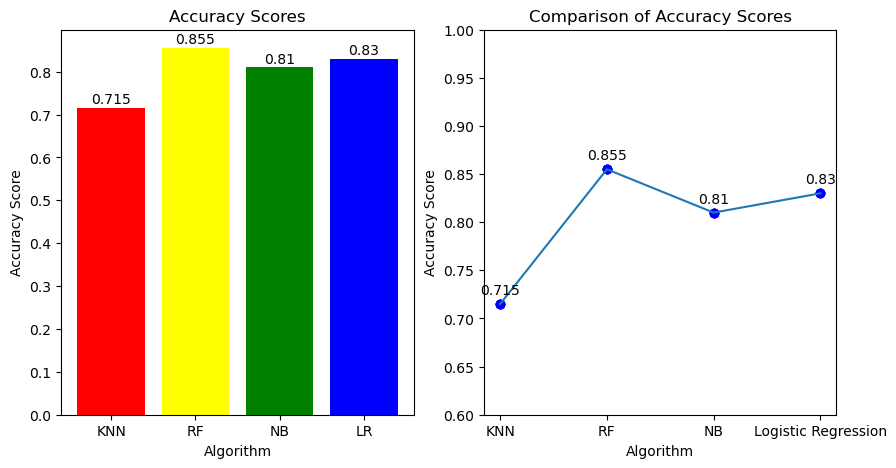

In [122]:
algorithms = ['KNN', 'RF', 'NB', 'LR']
accuracy_scores = [0.715, 0.855, 0.81, 0.83]

# Create the bar chart subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
bars = ax1.bar(algorithms, accuracy_scores, color=['red', 'yellow', 'green', 'blue'])
ax1.set_title('Accuracy Scores')
ax1.set_xlabel('Algorithm')
ax1.set_ylabel('Accuracy Score')

# Add text labels to the top of the bars
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, str(accuracy_scores[i]), ha='center')

x_labels = ['KNN', 'RF', 'NB', 'Logistic Regression']
y_values = [0.715, 0.855, 0.81, 0.83]

# Create the line plot subplot
ax2.plot(x_labels, y_values)
ax2.set_title('Comparison of Accuracy Scores')
ax2.set_xlabel('Algorithm')
ax2.set_ylabel('Accuracy Score')
ax2.set_ylim(0.6, 1.0)

# Add text labels to the line plot
for i, value in enumerate(y_values):
    ax2.text(x_labels[i], value + 0.01, str(value), ha='center')
    
    ax2.scatter(x_labels, y_values, color='blue')

# Show the plot
plt.show()